Вспомним решаемую проблему:
$$
\boldsymbol{x}(t) = \exp\left\{ \hat{A}t + \sum\limits_i \hat{B}_i W_i \right\}\boldsymbol{x}_0
$$
На основе формулы Ито конструируем стохастическое дифференциальное уравнение с таким решением:
$$
d\boldsymbol{x} = \left(\hat{A} + \dfrac{1}{2} \sum\limits_{i}\hat{B}_i^2 \right)\boldsymbol{x} dt + \sum\limits_i \hat{B}_i\boldsymbol{x}dW_i  
$$
Положим здесь:
$$
\hat{A} = \begin{pmatrix}
-\frac{1}{10} & -2\\
2 & -\frac{1}{10}
\end{pmatrix},  \qquad \hat{B}_1 = \begin{pmatrix}
0 & -0.1\\
0.1 & -0.1
\end{pmatrix},  \qquad \hat{B}_2 = \begin{pmatrix}
0 & -0.2\\
-0.2 & 0.3
\end{pmatrix}
$$

In [67]:
from sympy import *

In [68]:
g, w = symbols('gamma, omega', real=True)

A = Matrix([[g, -w],[w, g]])
X = MatrixSymbol('X', 2, 1)
t, dW1, dW2, dt = symbols("t, dW1, dW2, dt", real=True)
B1 = MatrixSymbol("B[1]", 2, 2)
B2 = MatrixSymbol("B[2]", 2, 2)
r = symbols('r', positive=True)
phi = symbols("phi")
RF = Matrix([r, phi])

In [69]:
dX = (A + Rational(1,2)*(B1**2))*X*dt + B1*X*dW1 + B2*X*dW2

In [70]:
dX.as_explicit()

Matrix([
[dW1*(B[1][0, 0]*X[0, 0] + B[1][0, 1]*X[1, 0]) + dW2*(B[2][0, 0]*X[0, 0] + B[2][0, 1]*X[1, 0]) + dt*((gamma + B[1][0, 0]**2/2 + B[1][0, 1]*B[1][1, 0]/2)*X[0, 0] + (-omega + B[1][0, 0]*B[1][0, 1]/2 + B[1][0, 1]*B[1][1, 1]/2)*X[1, 0])],
[ dW1*(B[1][1, 0]*X[0, 0] + B[1][1, 1]*X[1, 0]) + dW2*(B[2][1, 0]*X[0, 0] + B[2][1, 1]*X[1, 0]) + dt*((gamma + B[1][0, 1]*B[1][1, 0]/2 + B[1][1, 1]**2/2)*X[1, 0] + (omega + B[1][0, 0]*B[1][1, 0]/2 + B[1][1, 0]*B[1][1, 1]/2)*X[0, 0])]])

In [71]:
def ItoDiff(f, t, X, dt, dX):
    result = f.diff(t)*dt
    N = shape(X)[0]
    for i in range(N):
        result = result + f.diff(X[i])*dX[i]
        for j in range(N):
            result = result + Rational(1,2)*f.diff(X[i], X[j])*dX[i]*dX[j]
    return result

Some tests:

In [72]:
Y = MatrixSymbol("Y", 2, 1)
dY = Matrix([dW1 - 2*dW2, -dW1-3*dW2])
f = Y[0]**2 + Y[1]**2

In [73]:
ItoDiff(f, t, Y, dt, dY)

(-dW1 - 3*dW2)**2 + 2*(-dW1 - 3*dW2)*Y[1, 0] + (dW1 - 2*dW2)**2 + 2*(dW1 - 2*dW2)*Y[0, 0]

In [74]:
rfunc = sqrt(X[0]**2 + X[1]**2)
phifunc = atan2(X[1], X[0])
dWsubs = {dW1**2:dt, dW2**2:dt, dW1*dW2:0, dt**2:0, dW1*dt:0, dW2*dt:0}
Xsubs = {X[0]:RF[0]*cos(RF[1]), X[1]:RF[0]*sin(RF[1])}

In [75]:
dr = expand(ItoDiff(rfunc, t, X, dt, dX)).subs(dWsubs).subs(Xsubs)

In [76]:
dr = trigsimp(dr)

In [77]:
dr = powsimp(dr)

In [78]:
dr

dW1*r*(1 - cos(2*phi))*B[1][1, 1]/2 + dW1*r*(cos(2*phi) + 1)*B[1][0, 0]/2 + dW1*r*sin(2*phi)*B[1][0, 1]/2 + dW1*r*sin(2*phi)*B[1][1, 0]/2 + dW2*r*(1 - cos(2*phi))*B[2][1, 1]/2 + dW2*r*(cos(2*phi) + 1)*B[2][0, 0]/2 + dW2*r*sin(2*phi)*B[2][0, 1]/2 + dW2*r*sin(2*phi)*B[2][1, 0]/2 + dt*gamma*r - dt*r*(1 - cos(2*phi))**2*B[1][1, 1]**2/8 - dt*r*(1 - cos(2*phi))**2*B[2][1, 1]**2/8 + dt*r*(1 - cos(2*phi))*B[1][0, 1]**2/4 + dt*r*(1 - cos(2*phi))*B[1][0, 1]*B[1][1, 0]/4 + dt*r*(1 - cos(2*phi))*B[1][1, 1]**2/2 + dt*r*(1 - cos(2*phi))*B[2][0, 1]**2/4 + dt*r*(1 - cos(2*phi))*B[2][1, 1]**2/4 + dt*r*(-2*sin(2*phi) + sin(4*phi))*B[1][0, 1]*B[1][1, 1]/8 + dt*r*(-2*sin(2*phi) + sin(4*phi))*B[1][1, 0]*B[1][1, 1]/8 + dt*r*(-2*sin(2*phi) + sin(4*phi))*B[2][0, 1]*B[2][1, 1]/8 + dt*r*(-2*sin(2*phi) + sin(4*phi))*B[2][1, 0]*B[2][1, 1]/8 - dt*r*(2*sin(2*phi) + sin(4*phi))*B[1][0, 0]*B[1][0, 1]/8 - dt*r*(2*sin(2*phi) + sin(4*phi))*B[1][0, 0]*B[1][1, 0]/8 - dt*r*(2*sin(2*phi) + sin(4*phi))*B[2][0, 0]*B[2][0, 1]/

In [79]:
dphi = expand(ItoDiff(phifunc, t, X, dt, dX)).subs(dWsubs).subs(Xsubs)

In [80]:
dphi = trigsimp(dphi)

In [81]:
dphi = powsimp(dphi)

In [82]:
dphi = expand(dphi)

In [83]:
collect(dphi.coeff(dt), [cos(2*phi), sin(2*phi), cos(4*phi), sin(4*phi)])

omega + (-B[1][0, 0]*B[1][1, 0]/4 + B[1][0, 1]*B[1][1, 1]/4 - B[2][0, 0]*B[2][1, 0]/4 + B[2][0, 1]*B[2][1, 1]/4)*cos(2*phi)**2 + (B[1][0, 0]*B[1][0, 1]/4 - B[1][0, 0]*B[1][1, 0]/4 - B[1][0, 1]*B[1][1, 1]/4 + B[1][1, 0]*B[1][1, 1]/4 - B[2][0, 0]*B[2][1, 0]/2 - B[2][0, 1]*B[2][1, 1]/2)*cos(2*phi) + (B[1][0, 1]**2/4 - B[1][1, 0]**2/4 + B[2][0, 0]**2/4 + B[2][0, 1]**2/4 - B[2][1, 0]**2/4 - B[2][1, 1]**2/4)*sin(2*phi) + (-B[1][0, 0]*B[1][0, 1]/4 - B[1][0, 0]*B[1][1, 0]/8 + B[1][0, 1]*B[1][1, 1]/8 + B[1][1, 0]*B[1][1, 1]/4 - B[2][0, 0]*B[2][0, 1]/4 - B[2][0, 0]*B[2][1, 0]/8 + B[2][0, 1]*B[2][1, 1]/8 + B[2][1, 0]*B[2][1, 1]/4)*cos(4*phi) + (B[1][0, 0]**2/8 - B[1][0, 0]*B[1][1, 1]/4 - B[1][0, 1]**2/8 - B[1][0, 1]*B[1][1, 0]/4 - B[1][1, 0]**2/8 + B[1][1, 1]**2/8 + B[2][0, 0]**2/8 - B[2][0, 0]*B[2][1, 1]/4 - B[2][0, 1]**2/8 - B[2][0, 1]*B[2][1, 0]/4 - B[2][1, 0]**2/8 + B[2][1, 1]**2/8)*sin(4*phi) + B[1][0, 0]*B[1][1, 0]/8 - B[1][0, 1]*B[1][1, 1]/8 + B[2][0, 0]*B[2][0, 1]/4 - B[2][0, 0]*B[2][1, 0

In [84]:
import sdeint
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

In [150]:
Anp = np.array([[-0.1, -2.0],
              [ 2.0, -0.1]])

B_1np = 10*np.array([[0., -0.02],
              [ -0.02, 0.03]])
B_2np = 10*np.array([[0., -0.02],
              [ -0.02, 0.03]])

tspan = np.linspace(0.0, 3.5, 10001)
deltat = tspan[1:] - tspan[:-1]
#dW = np.random.normal(size=(len(tspan)-1, 2))*np.reshape(np.sqrt(dt), (-1,1))
dWnp = sdeint.deltaW(len(tspan)-1, 2, deltat[0])
#dW[np.logical_not(np.logical_or(np.logical_and(tspan[1:] > 13*np.pi/12, tspan[1:] < 14*np.pi/12), np.logical_and(tspan[1:] > 7*np.pi/12, tspan[1:] < 8*np.pi/12)))] = 0.
x0 = np.array([3.0, 0.0])

In [151]:
# Exact solution
Wnp = np.vstack(([0., 0.], np.cumsum(dWnp, axis=0)))
x_th = np.array([linalg.expm(Anp*t + B_1np*w[0] + B_2np*w[1]) @ x0 for t,w in zip(tspan, Wnp)])

In [152]:
gamma = Anp[0,0]
omega = abs(Anp[1,0])
params = {g:gamma, w:omega, B1:Matrix(B_1np), B2:Matrix(B_2np)}

drt = lambdify([r,phi,t], dr.coeff(dt).subs(params), "numpy")
drw1 = lambdify([r,phi,t], dr.coeff(dW1).subs(params), "numpy")
drw2 = lambdify([r,phi,t], dr.coeff(dW2).subs(params), "numpy")
dphit = lambdify([r,phi,t], dphi.coeff(dt).subs(params), "numpy")
dphiw1 = lambdify([r,phi,t], dphi.coeff(dW1).subs(params), "numpy")
dphiw2 = lambdify([r,phi,t], dphi.coeff(dW2).subs(params), "numpy")

def f(x, t):
    return np.array([drt(x[0], x[1], t),dphit(x[0], x[1], t)])

def G(x, t):
    return np.array([[drw1(x[0], x[1], t), drw2(x[0], x[1], t)], [dphiw1(x[0], x[1], t), dphiw2(x[0], x[1], t)]])
    #return np.array([B_1@x, B_2@x])

In [153]:
def Iwik_wrapper(dW, h, generator=None):
    n = int(np.ceil(np.sqrt(1/h)))
    print(n)
    return sdeint.Iwik(dW, h, n=n, generator=generator)

In [154]:
z_eu = sdeint.itoEuler(f, G, x0, tspan, dW=dWnp)
z_sri = sdeint.itoSRI2(f, G, x0, tspan, Imethod=Iwik_wrapper, dW=dWnp)

54


[]

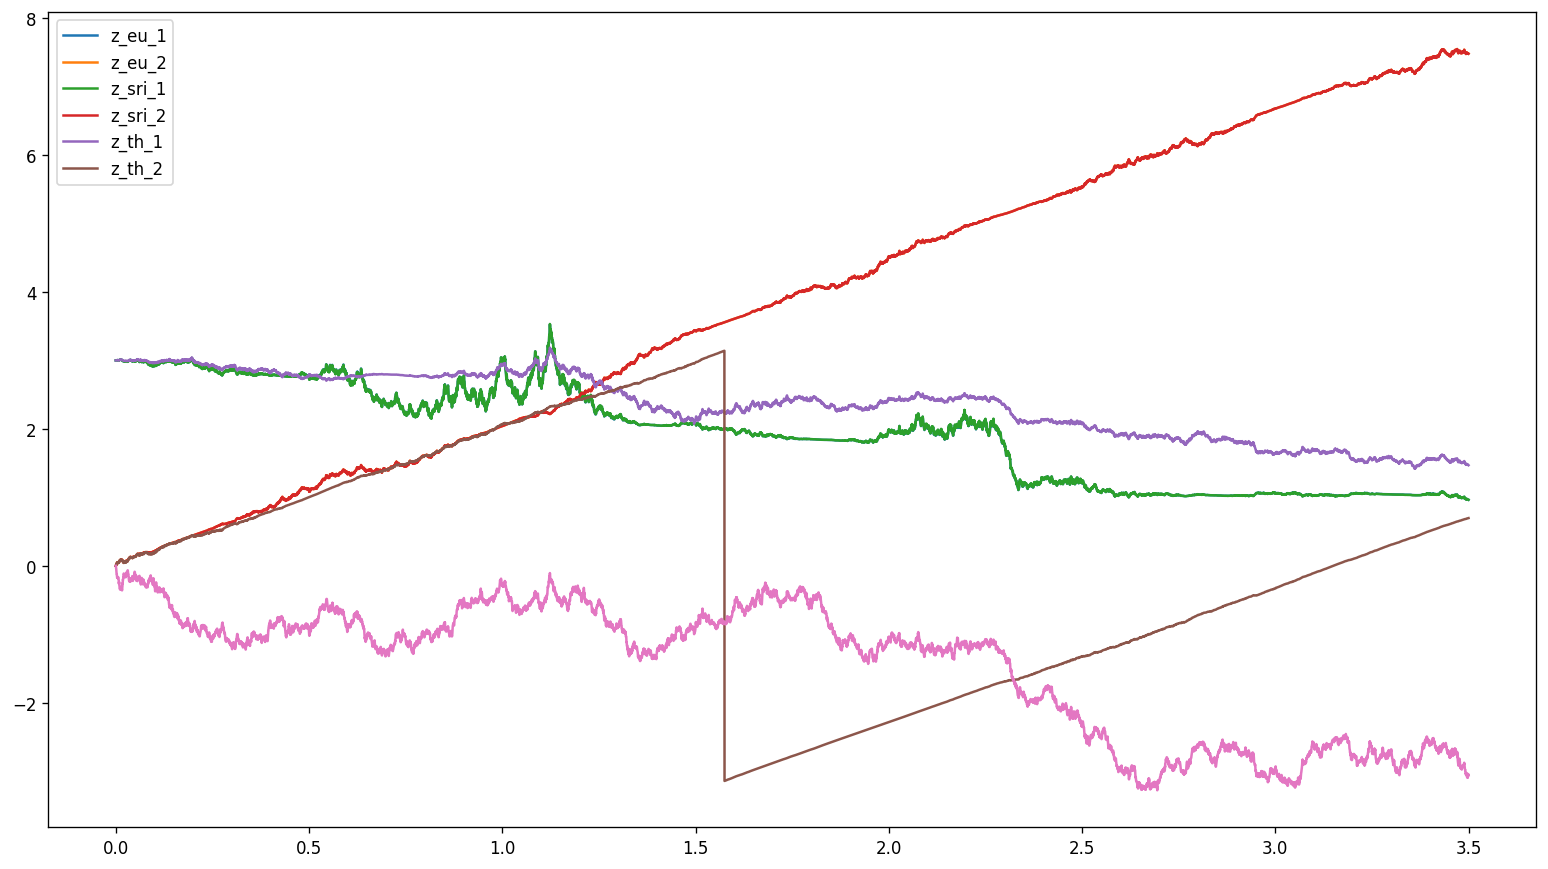

In [155]:
z_th = np.array([np.sqrt(x_th[:,0]**2 + x_th[:,1]**2), np.arctan2(x_th[:,1], x_th[:,0])]).T

plt.figure(figsize=(16, 9), dpi=120)
plt.plot(tspan, z_eu, label=("z_eu_1", "z_eu_2"))
plt.plot(tspan, z_sri, label=("z_sri_1", "z_sri_2"))
plt.plot(tspan, z_th, label=("z_th_1", "z_th_2"))
plt.plot(tspan, Wnp[:,0])
plt.legend()
plt.plot()

In [156]:
x_eu = np.array([z_eu[:,0]*np.cos(z_eu[:,1]), z_eu[:,0]*np.sin(z_eu[:,1])]).T

[]

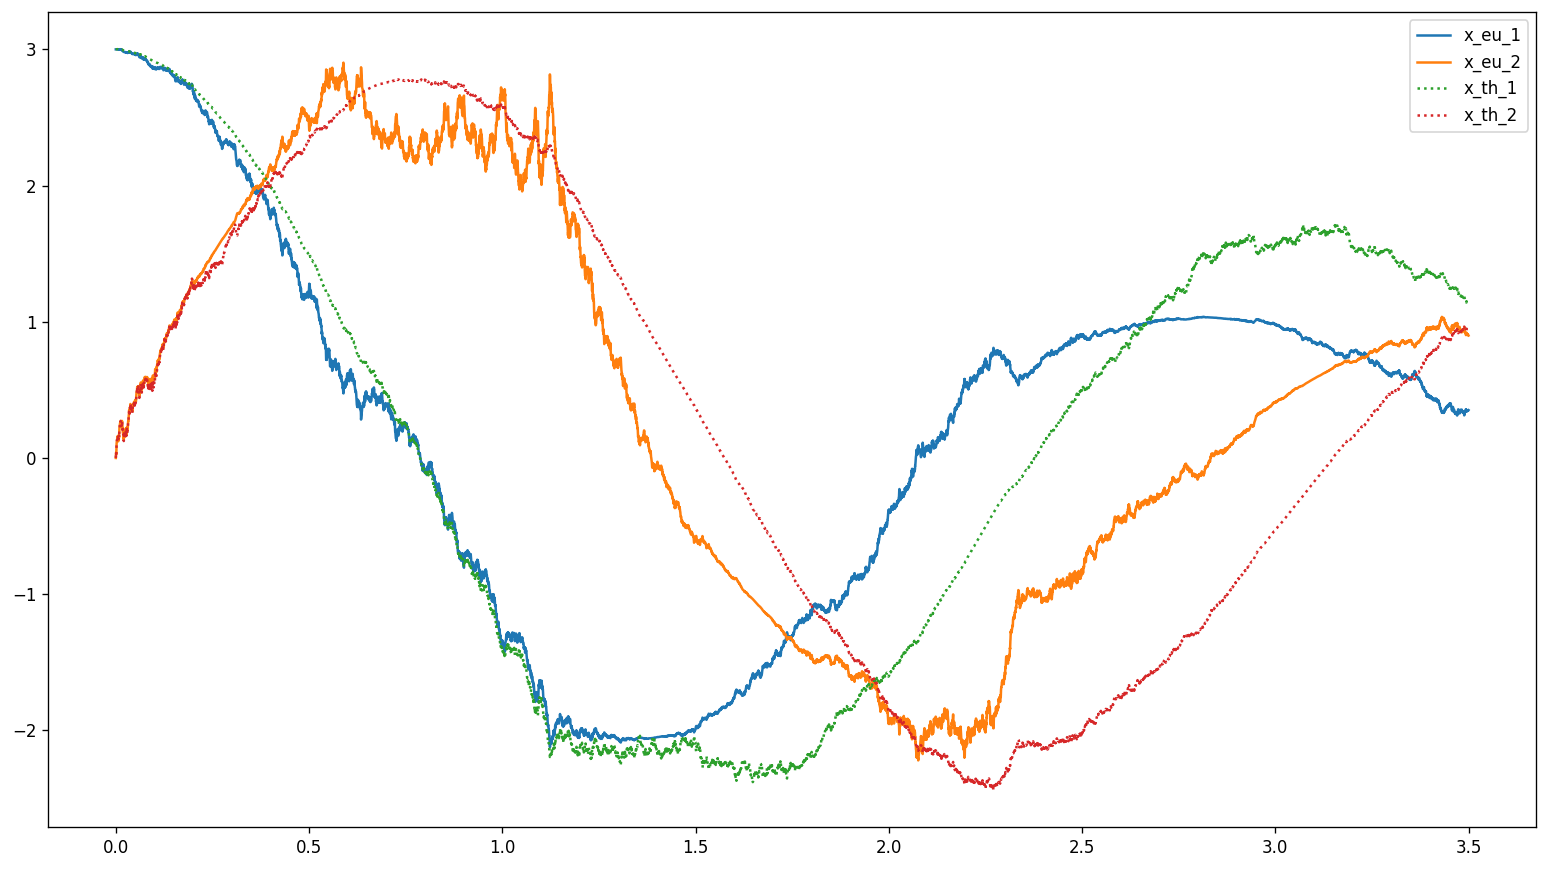

In [157]:
plt.figure(figsize=(16, 9), dpi=120)
plt.plot(tspan, x_eu, label=("x_eu_1", "x_eu_2"))
plt.plot(tspan, x_th, ":", label=("x_th_1", "x_th_2"))
#plt.plot(tspan, Wnp, label=("W_1", "W_2"))
plt.legend()
plt.plot()